In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df=pd.read_csv("gimnasio.csv")
df_raw=df.copy()
df_raw.head()

,member_id,visit_date,age,gender,membership_type,workout_type,workout_duration_minutes,calories_burned,check_in_time,attendance_status
0,1,2024-10-11,64,Other,Annual,HIIT,28,171,20:04,Absent
1,2,2024-06-01,65,Female,Quarterly,Strength Training,72,650,19:17,Absent
2,3,2024-06-13,45,Male,Quarterly,Cardio,70,633,7:24,Absent
3,4,2024-02-05,35,Female,Monthly,CrossFit,64,362,7:18,Absent
4,5,2024-07-13,26,Female,Quarterly,Yoga,31,262,11:22,Absent


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   member_id                 2600 non-null   int64 
 1   visit_date                2600 non-null   object
 2   age                       2600 non-null   int64 
 3   gender                    2600 non-null   object
 4   membership_type           2600 non-null   object
 5   workout_type              2600 non-null   object
 6   workout_duration_minutes  2600 non-null   int64 
 7   calories_burned           2600 non-null   int64 
 8   check_in_time             2600 non-null   object
 9   attendance_status         2600 non-null   object
dtypes: int64(4), object(6)
memory usage: 203.3+ KB


In [182]:
df_raw.dtypes

member_id                    int64
visit_date                  object
age                          int64
gender                      object
membership_type             object
workout_type                object
workout_duration_minutes     int64
calories_burned              int64
check_in_time               object
attendance_status           object
dtype: object

In [183]:
df_raw.describe()

,member_id,age,workout_duration_minutes,calories_burned
count,2600.000000,2600.000000,2600.000000,2600.000000
mean,1300.500000,41.947308,70.162692,523.775385
std,750.699674,13.862067,28.610264,240.449717
min,1.000000,18.000000,20.000000,102.000000
25%,650.750000,30.000000,46.000000,329.000000
50%,1300.500000,42.000000,70.000000,504.000000
75%,1950.250000,54.000000,94.000000,691.250000
max,2600.000000,65.000000,120.000000,1186.000000


In [184]:
df_raw.describe(include="O")

,visit_date,gender,membership_type,workout_type,check_in_time,attendance_status
count,2600,2600,2600,2600,2600,2600
unique,366,3,3,5,982,2
top,2024-12-02,Female,Annual,Strength Training,6:44,Absent
freq,16,886,903,559,9,1350


In [185]:
df_raw.isna().sum()

member_id                   0
visit_date                  0
age                         0
gender                      0
membership_type             0
workout_type                0
workout_duration_minutes    0
calories_burned             0
check_in_time               0
attendance_status           0
dtype: int64

In [186]:
num_cols=df_raw.select_dtypes(include="int64").columns
cat_cols=df_raw.select_dtypes(include=["category","O"]).columns
cat_cols = cat_cols.drop(['visit_date','check_in_time'])
date_cols=["visit_date","check_in_time"]

print(num_cols)
print(cat_cols)
print(date_cols)

Index(['member_id', 'age', 'workout_duration_minutes', 'calories_burned'], dtype='object')
Index(['gender', 'membership_type', 'workout_type', 'attendance_status'], dtype='object')
['visit_date', 'check_in_time']


In [187]:
y=df_raw["calories_burned"]
x=df_raw.drop(columns=["calories_burned","member_id"])

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)


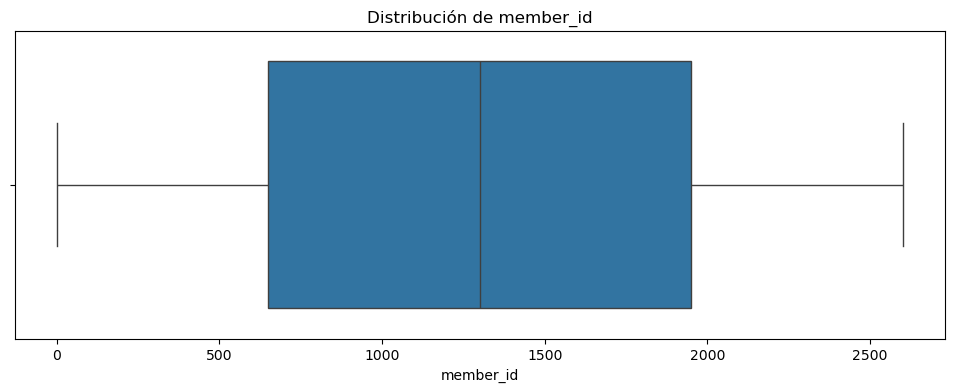

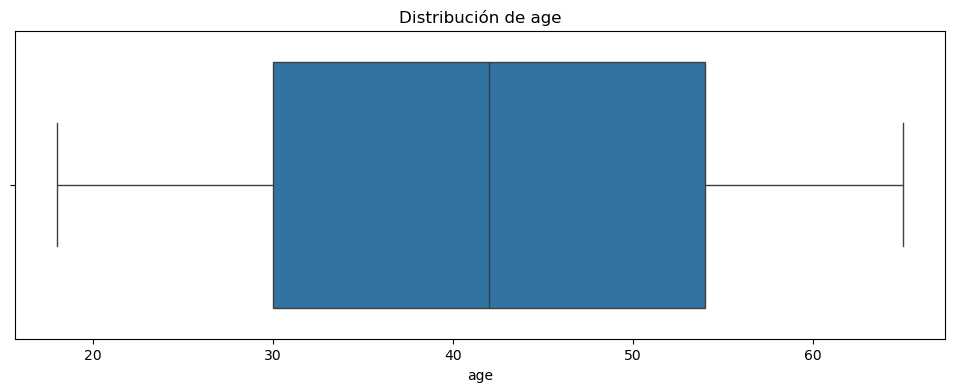

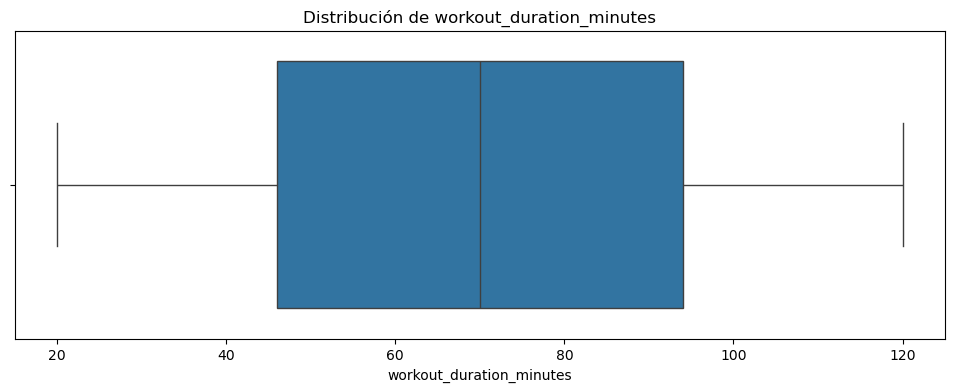

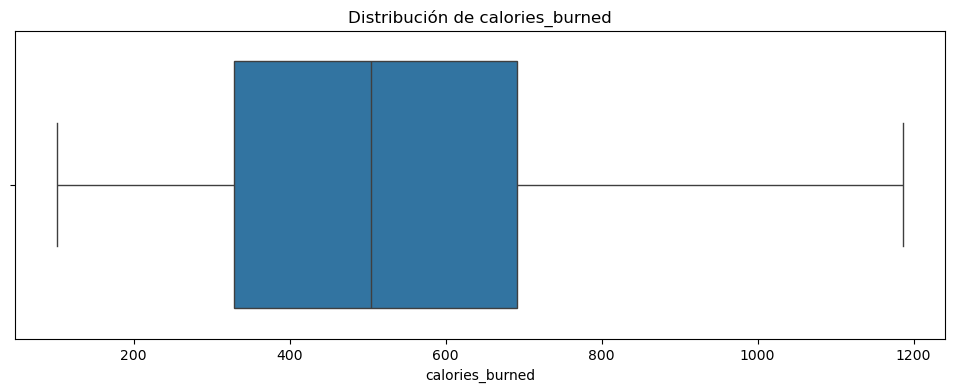

In [188]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df_raw[col])
    plt.title(f"Distribución de {col}")
    plt.show()

In [189]:
Q1=df_raw[num_cols].quantile(0.25)
Q3=df_raw[num_cols].quantile(0.75)
IQR=Q3-Q1

upper=Q3 + 1.5 *IQR
lower=Q1 - 1.5 *IQR

outliers=(df_raw[num_cols]>upper) | (df_raw[num_cols]<lower)

print(outliers.sum())


member_id                   0
age                         0
workout_duration_minutes    0
calories_burned             0
dtype: int64


In [190]:
mean=df_raw[num_cols].mean()
standard=df_raw[num_cols].std()
zscore=(df_raw[num_cols]-mean)/standard

print(zscore)
outliers=(zscore> abs(3))
print(outliers.sum())

      member_id       age  workout_duration_minutes  calories_burned
0     -1.731052  1.590866                 -1.473691        -1.467148
1     -1.729720  1.663005                  0.064218         0.524952
2     -1.728388  0.220219                 -0.005687         0.454251
3     -1.727055 -0.501174                 -0.215401        -0.672803
4     -1.725723 -1.150428                 -1.368834        -1.088691
...         ...       ...                       ...              ...
2595   1.725723  1.590866                 -0.250354        -0.335935
2596   1.727055 -1.438985                 -1.333881        -1.005513
2597   1.728388  0.148080                  0.833173         1.460699
2598   1.729720  1.446587                 -0.425116        -0.918177
2599   1.731052  1.446587                 -0.180449         0.358597

[2600 rows x 4 columns]
member_id                   0
age                         0
workout_duration_minutes    0
calories_burned             0
dtype: int64


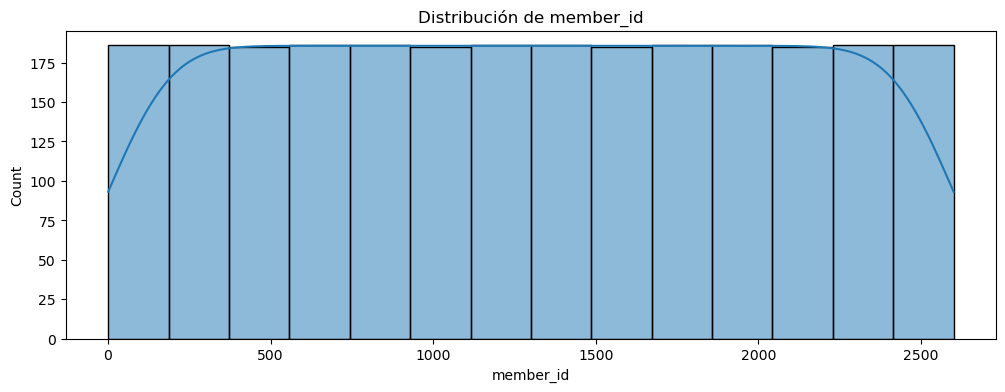

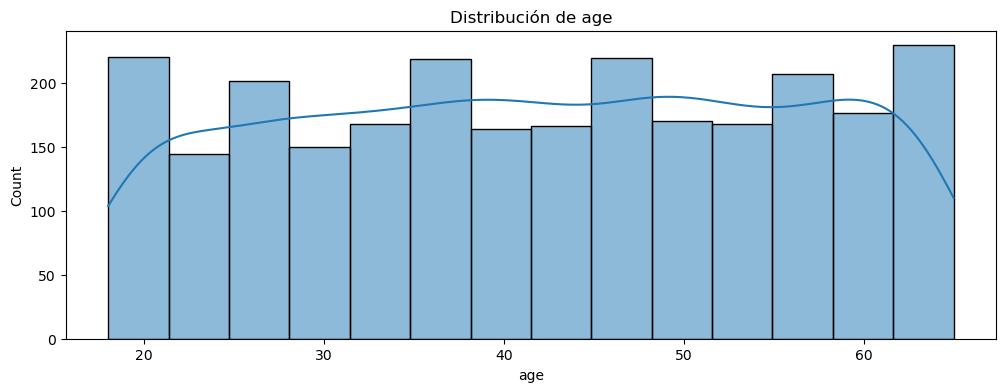

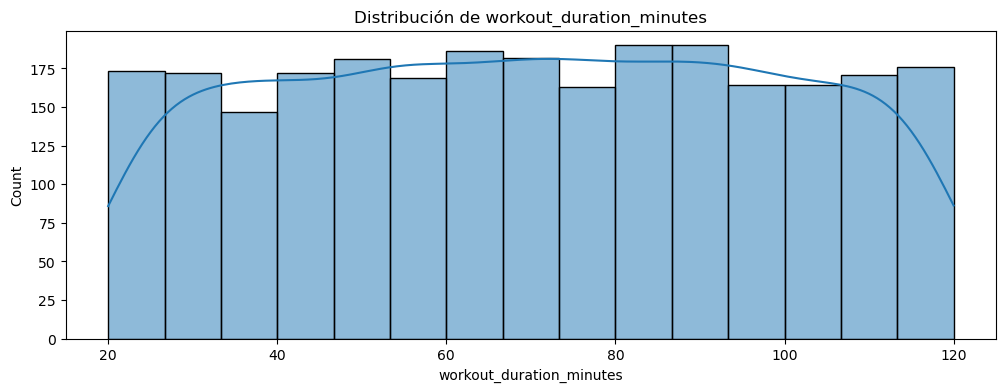

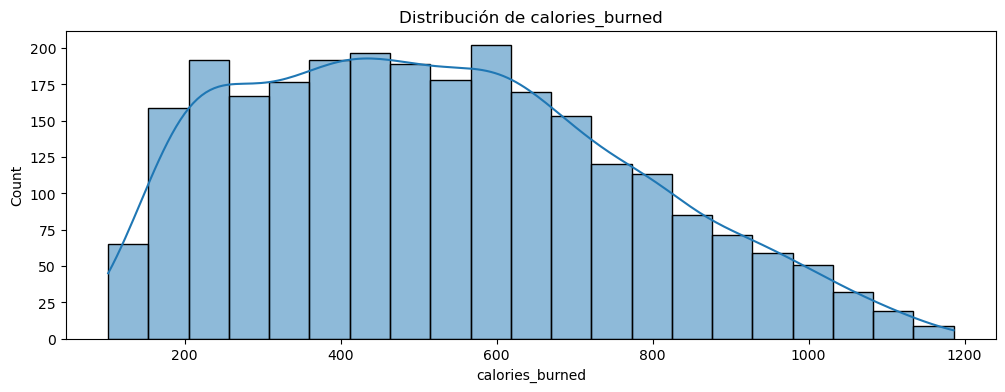

In [191]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(x=df_raw[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

In [192]:
# Estas son las únicas dos numéricas que quedaron en x_train
cols_a_escalar = ['age', 'workout_duration_minutes']

from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

# Escalamos solo las columnas presentes en x_train
x_train[cols_a_escalar] = stdScaler.fit_transform(x_train[cols_a_escalar])
x_test[cols_a_escalar] = stdScaler.transform(x_test[cols_a_escalar])

print("X_train escalado:")
print(x_train[cols_a_escalar].head())

X_train escalado:
           age  workout_duration_minutes
582  -1.016418                  0.629558
48   -0.008480                  1.155073
1772  0.639480                 -0.246302
964  -1.088414                 -1.157195
2213  1.359435                  0.139076


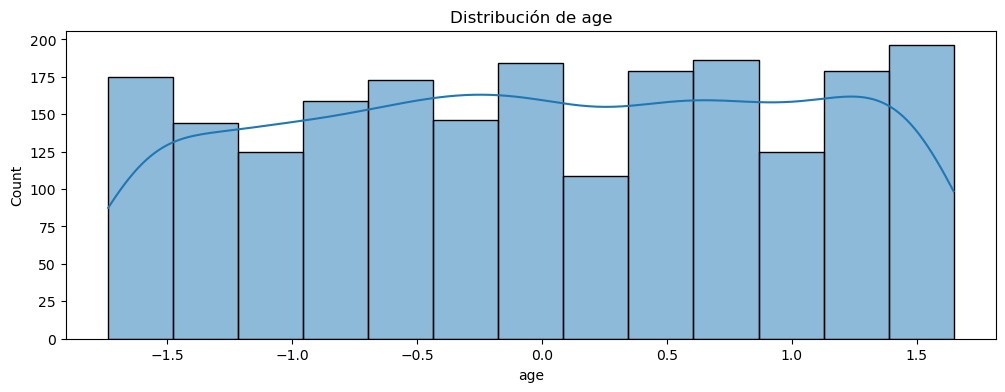

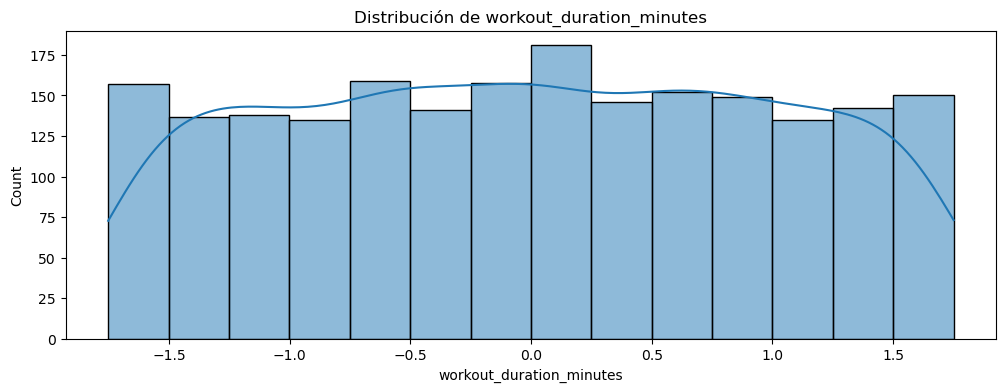

In [193]:
for col in cols_a_escalar:
    plt.figure(figsize=(12,4))
    sns.histplot(x=x_train[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

In [194]:

x_train=pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_test=pd.get_dummies(x_test, columns=cat_cols, drop_first=True)
x_train.head()

,visit_date,age,workout_duration_minutes,check_in_time,gender_Male,gender_Other,membership_type_Monthly,membership_type_Quarterly,workout_type_CrossFit,workout_type_HIIT,workout_type_Strength Training,workout_type_Yoga,attendance_status_Present
582,2024-09-07,-1.016418,0.629558,6:35,False,True,True,False,False,False,True,False,False
48,2024-07-02,-0.008480,1.155073,16:47,True,False,True,False,True,False,False,False,True
1772,2024-11-23,0.639480,-0.246302,8:13,False,False,False,True,False,True,False,False,False
964,2024-09-29,-1.088414,-1.157195,14:58,False,False,False,True,False,False,False,True,False
2213,2024-05-20,1.359435,0.139076,14:45,False,False,False,True,False,False,False,True,True


In [195]:
x_train["visit_date"]=pd.to_datetime(x_train["visit_date"])
x_train.dtypes

visit_date                        datetime64[ns]
age                                      float64
workout_duration_minutes                 float64
check_in_time                             object
gender_Male                                 bool
gender_Other                                bool
membership_type_Monthly                     bool
membership_type_Quarterly                   bool
workout_type_CrossFit                       bool
workout_type_HIIT                           bool
workout_type_Strength Training              bool
workout_type_Yoga                           bool
attendance_status_Present                   bool
dtype: object

In [196]:

# 1. Convertimos a datetime
x_train['check_in_time'] = pd.to_datetime(x_train['check_in_time'], format='%H:%M')
x_test['check_in_time'] = pd.to_datetime(x_test['check_in_time'], format='%H:%M')

# 2. Extraemos y forzamos a entero con .astype(int)
x_train['check_in_hour'] = x_train['check_in_time'].dt.hour.astype(int)
x_train['check_in_minute'] = x_train['check_in_time'].dt.minute.astype(int)

x_test['check_in_hour'] = x_test['check_in_time'].dt.hour.astype(int)
x_test['check_in_minute'] = x_test['check_in_time'].dt.minute.astype(int)

# 3. ¡MUY IMPORTANTE! Tienes que quitar TAMBIÉN 'visit_date'
# El error anterior ocurría porque las FECHAS no pueden ir al modelo.
x_train = x_train.drop(columns=['check_in_time', 'visit_date'], errors='ignore')
x_test = x_test.drop(columns=['check_in_time', 'visit_date'], errors='ignore')

# Ahora sí puedes entrenar
# rdmforest.fit(x_train, y_train)

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rdmforest=RandomForestRegressor()
rdmforest.fit(x_train,y_train)
score=rdmforest.score(x_test, y_test)
print(score)



0.7671637313616


In [198]:
cols_train = set(x_train.columns)
cols_test = set(x_test.columns)

print(f"Columnas solo en Train: {cols_train - cols_test}")
print(f"Columnas solo en Test: {cols_test - cols_train}")

Columnas solo en Train: set()
Columnas solo en Test: set()
